<a href="https://colab.research.google.com/github/Gabriela3005a/Examen-Final-Modelos-y-aprendizaje/blob/main/Examen_Gabriela_Chiliquinga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from ucimlrepo import fetch_ucirepo


In [ ]:
#importar librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#abrir base de datos
base = pd.read_csv('D:/MAESTRIA BIG DATA/Modelos y Aprendizaje/EXAMEN/base1.csv')
base.head(569)


,ID number,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
print("\nInformación del dataset:")
print(base.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID number           569 non-null    object 
 1   Diagnosis           569 non-null    object 
 2   radius1             569 non-null    float64
 3   texture1            569 non-null    float64
 4   perimeter1          569 non-null    float64
 5   area1               569 non-null    float64
 6   smoothness1         569 non-null    float64
 7   compactness1        569 non-null    float64
 8   concavity1          569 non-null    float64
 9   concave_points1     569 non-null    float64
 10  symmetry1           569 non-null    float64
 11  fractal_dimension1  569 non-null    float64
 12  radius2             569 non-null    float64
 13  texture2            569 non-null    float64
 14  perimeter2          569 non-null    float64
 15  area2               569 non-nul

In [ ]:
base['ID number'] = base['ID number'].astype(str)

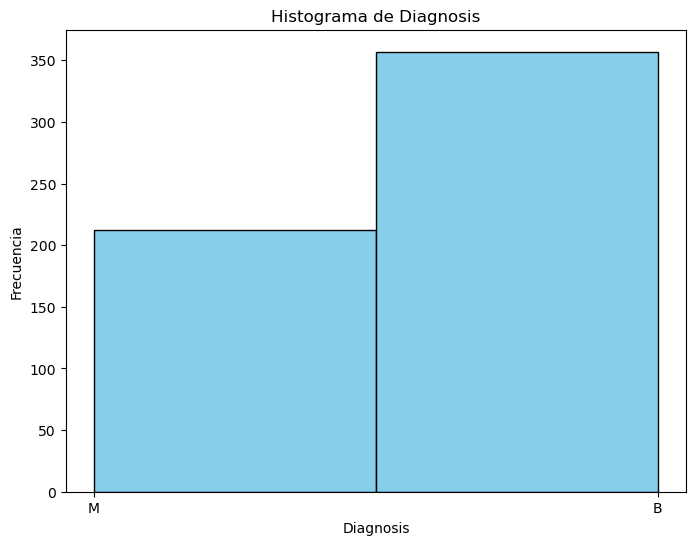

In [ ]:
# Crear el histograma de diagnosticos malignos y benignos
plt.figure(figsize=(8, 6))
plt.hist(base['Diagnosis'], bins=2, color='skyblue', edgecolor='black')

# Añadir etiquetas y título
plt.title('Histograma de Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()


MODELO N°1

RANDOM FOREST

In [ ]:
#Importar las librerias necesarias
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [ ]:
# Definir características (X) y etiquetas (y), se preparan los datos para dividirlos.
X = base.drop(columns=['ID number', 'Diagnosis'])  # Características
y = base['Diagnosis']  # Etiquetas

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Crear un imputador para reemplazar los valores faltantes con la media
imputer = SimpleImputer(strategy='mean')


In [ ]:
# Imputar los valores faltantes en X_train y X_test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [ ]:
# Normalizar los datos de entrenamiento y prueba (ayuda a que las caracterisiticas esten en la misma escala)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [ ]:
# Ajuste de hiperparámetros con GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10]
}

El GridSearchCV es una técnica que busca exhaustivamente a través de una cuadrícula de hiperparámetros proporcionada y evalúa el rendimiento del modelo para cada combinación de hiperparámetros. Esto es útil para encontrar la mejor combinación de hiperparámetros que optimice el rendimiento del modelo en un conjunto de datos específico.

In [ ]:
# Búsqueda de cuadrícula para encontrar la mejor combinación de hiperparámetros para un clasificador de Bosques Aleatorios (Random Forest Classifier).
clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='precision')
grid_search.fit(X_train_scaled, y_train)

c:\Users\Equipo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Equipo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Equipo\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Equipo\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Equipo\ana

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='precision')

In [ ]:
# Obtener el mejor modelo
best_model = grid_search.best_estimator_

In [ ]:
# Balancear las clases con SMOTE solo en el conjunto de entrenamiento
# Se utiliza para abordar el problema de desequilibrio de clases en el conjunto de entrenamiento,
# mejorar el rendimiento de los modelos de aprendizaje automático al tratar con conjuntos de datos desbalanceados.
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


In [ ]:
# Entrenar el mejor modelo con los datos balanceados y normalizados
best_model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
# Realizar validación cruzada solo en el conjunto de entrenamiento
# Proporciona una estimación del rendimiento del modelo de aprendizaje automático en datos no observados y ayuda a evaluar la generalización del modelo.
scores = cross_val_score(best_model, X_train_resampled, y_train_resampled, cv=5, scoring='precision')
print("Precisión media en validación cruzada:", scores.mean())


c:\Users\Equipo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Equipo\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\Equipo\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Equipo\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Equipo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
     

Precisión media en validación cruzada: nan


c:\Users\Equipo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Equipo\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\Equipo\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Equipo\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Equipo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
     

In [ ]:
# Predecir en los datos de prueba
y_pred = best_model.predict(X_test_scaled)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Codificar las etiquetas en forma numérica
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

# Calcular métricas
precision = precision_score(y_test_encoded, y_pred_encoded)
f1 = f1_score(y_test_encoded, y_pred_encoded)
auc_roc = roc_auc_score(y_test_encoded, y_pred_encoded)

print("Precisión del modelo:", precision)
print("Puntaje F1:", f1)
print("AUC-ROC:", auc_roc)

Precisión del modelo: 0.9545454545454546
Puntaje F1: 0.9655172413793104
AUC-ROC: 0.9742875859810023


Cálculo de métricas de evaluación:

Se calculan tres métricas comunes para evaluar la calidad del modelo de clasificación

precision: La precisión es la proporción de verdaderos positivos (predicciones correctas de la clase positiva) sobre el total de predicciones positivas.

f1: El puntaje F1 es una medida que combina precisión y recall (sensibilidad) en un solo valor. Es útil cuando las clases están desequilibradas.

auc_roc: El área bajo la curva ROC (AUC-ROC) es una medida de la capacidad del modelo para distinguir entre las clases. Representa la probabilidad de que el modelo clasifique una instancia positiva aleatoria más alta que una instancia negativa aleatoria.

Las métricas indican que el modelo tiene una precisión del 95.45%, un puntaje F1 del 96.55% y un AUC-ROC del 97.43%, lo que sugiere un buen rendimiento en la clasificación de los casos de cáncer en el conjunto de prueba.

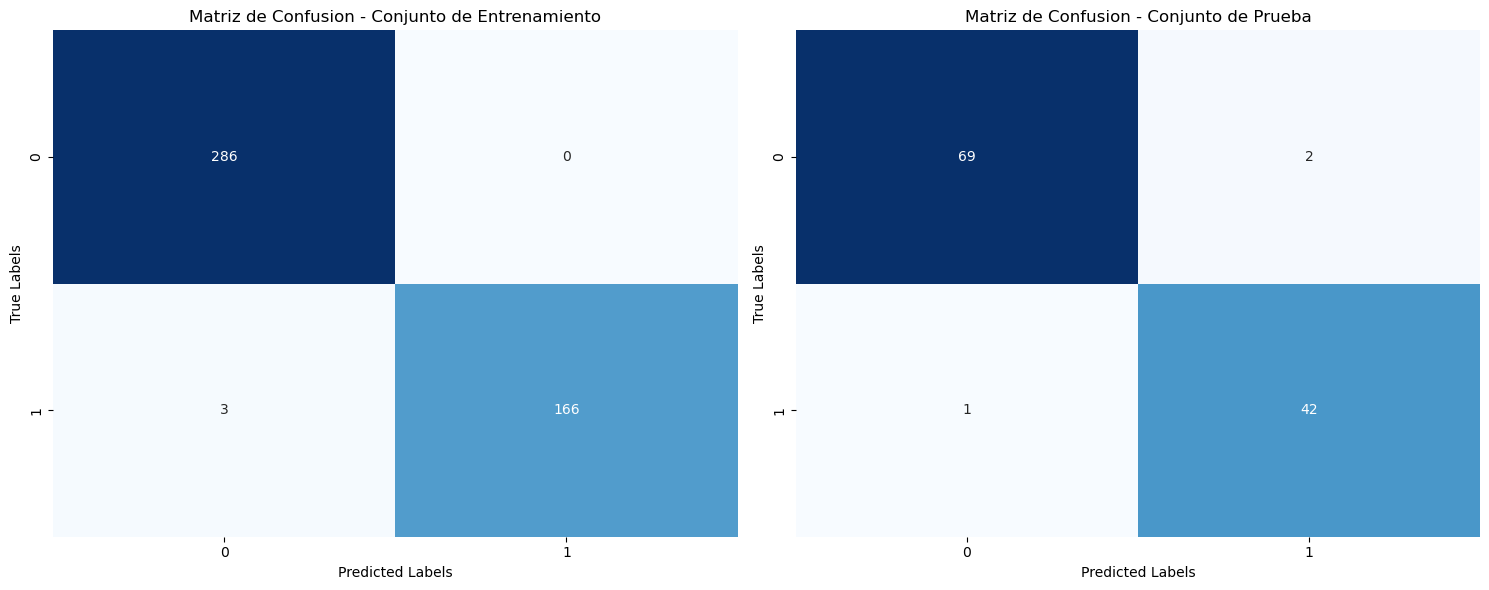

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Función para visualizar la matriz de confusión
def plot_confusion_matrix(ax, y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')

# Predicciones en el conjunto de entrenamiento
y_train_pred = best_model.predict(X_train_scaled)
# Predicciones en el conjunto de prueba
y_test_pred = best_model.predict(X_test_scaled)

# Crear subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Matriz de confusión para el conjunto de entrenamiento
plot_confusion_matrix(axes[0], y_train, y_train_pred, title="Matriz de Confusion - Conjunto de Entrenamiento")
# Matriz de confusión para el conjunto de prueba
plot_confusion_matrix(axes[1], y_test, y_test_pred, title="Matriz de Confusion - Conjunto de Prueba")

plt.tight_layout()
plt.show()


La matriz de confusión muestran si el modelo logro predecir adecuadamente las personas que tienen cancer:

-True Positive (TP): El modelo predijo correctamente que las instancias pertenecen a la clase positiva.

-True Negative (TN): El modelo predijo correctamente que las instancias no pertenecen a la clase positiva.

-False Positive (FP): El modelo predijo incorrectamente que las instancias pertenecen a la clase positiva (falso positivo).

-False Negative (FN): El modelo predijo incorrectamente que las instancias no pertenecen a la clase positiva (falso negativo).

Para la clase 0 de la matriz de confusion conjunto de Prueba el modelo predijo correctamente 69  instancias (TP).
Para la clase 1, el modelo predijo correctamente 42 instancias (TP).


El modelo tuvo 1 falso negativo el cual significa que se diagnosticó que una persona no tenía cancer cuando en realidad si tenia, influyendo en un tratamiento oportuno para su enfermedad.

También se tuvo 2 falsos positivos que significa que se diagnostico a dos personas con cancer cuando en realidad no lo tenian.

MODELO N° 2

REGRESION LOGISTICA

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

In [ ]:
# Definir características (X) y etiquetas (y)
X = base.drop(columns=['ID number', 'Diagnosis'])  # Características
y = base['Diagnosis']  # Etiquetas

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Inicializar y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\Equipo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Realizar predicciones en datos de prueba
y_pred = model.predict(X_test)

In [ ]:
# Convertir etiquetas 'M' y 'B' a valores numéricos
# Transforman las etiquetas categóricas 'M' y 'B' en valores numéricos 1 y 0, respectivamente,
y_test_numeric = y_test.map({'M': 1, 'B': 0})
y_pred_numeric = pd.Series(y_pred).map({'M': 1, 'B': 0})

# Calcular métricas
accuracy = accuracy_score(y_test_numeric, y_pred_numeric)
precision = precision_score(y_test_numeric, y_pred_numeric)
recall = recall_score(y_test_numeric, y_pred_numeric)
f1 = f1_score(y_test_numeric, y_pred_numeric)
auc_roc = roc_auc_score(y_test_numeric, y_pred_numeric)

# Imprimir métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", auc_roc)

Accuracy: 0.9649122807017544
Precision: 0.975609756097561
Recall: 0.9302325581395349
F1 Score: 0.9523809523809524
ROC AUC Score: 0.9580740255486406


Accuracy (Precisión):
La precisión es la proporción de predicciones correctas (verdaderos positivos y verdaderos negativos) sobre el total de predicciones.
En este caso, el modelo tiene una precisión del 96.49%, lo que significa que el 96.49% de las predicciones del modelo son correctas.

Precision (Precisión):
La precisión es la proporción de verdaderos positivos (pacientes correctamente identificados con cáncer) sobre el total de casos clasificados como positivos (tanto verdaderos positivos como falsos positivos).
En este caso, la precisión es del 97.56%, lo que significa que el 97.56% de los casos clasificados como positivos por el modelo realmente tienen cáncer.


Recall (Recuperación o Sensibilidad):
El recall es la proporción de verdaderos positivos sobre el total de casos positivos reales (verdaderos positivos más falsos negativos).
En este caso, el recall es del 93.02%, lo que significa que el modelo identifica correctamente al 93.02% de los pacientes que realmente tienen cáncer.


F1 Score: El puntaje F1 es la media armónica de la precisión y el recall. Proporciona una medida única del rendimiento del modelo que tiene en cuenta tanto la precisión como el recall.
En este caso, el puntaje F1 es del 95.24%.

ROC AUC Score: El área bajo la curva ROC (ROC AUC) es una medida de la capacidad del modelo para distinguir entre las clases. Representa la probabilidad de que el modelo clasifique una instancia positiva aleatoria más alta que una instancia negativa aleatoria.
En este caso, el ROC AUC Score es del 95.81%.

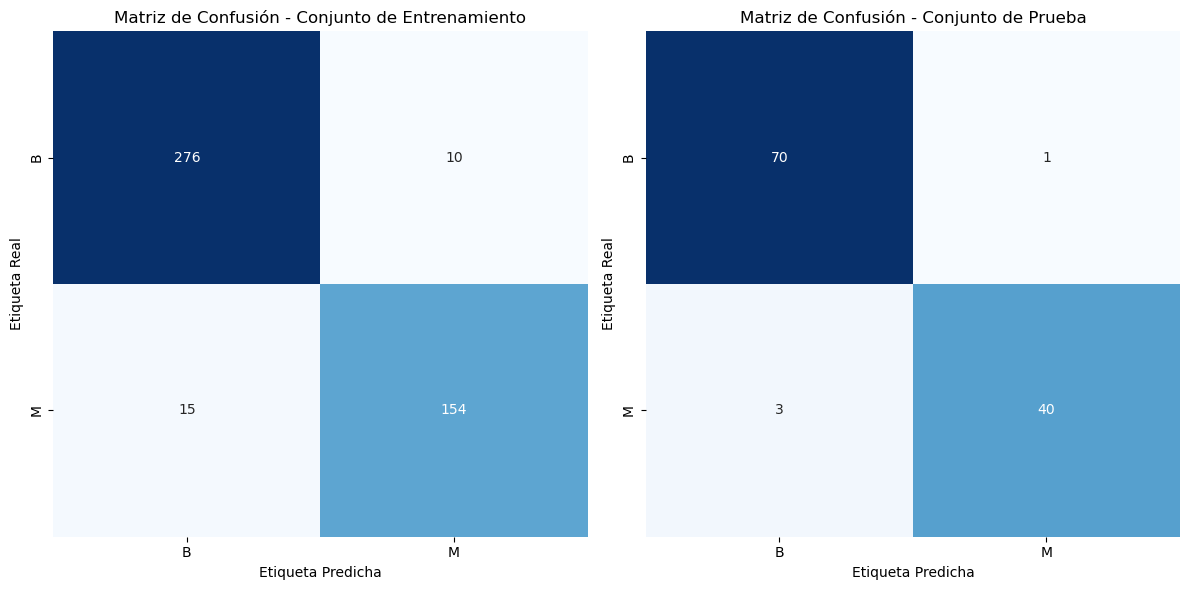

In [ ]:
# Obtener matrices de confusión
conf_matrix_train = confusion_matrix(y_train, model.predict(X_train))
conf_matrix_test = confusion_matrix(y_test, y_pred)

# Visualizar matrices de confusión
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Matriz de Confusión - Conjunto de Entrenamiento')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Matriz de Confusión - Conjunto de Prueba')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')

plt.tight_layout()
plt.show()


La matriz de confusión muestran si el modelo logro predecir adecuadamente las personas que tienen cancer:


Para la clase 0 de la matriz de confusion conjunto de Prueba el modelo predijo correctamente 70  instancias (TP).
Para la clase 1, el modelo predijo correctamente 40 instancias (TP).


El modelo tuvo 3 falso negativo el cual significa que se diagnostico que una persona no tenia cancer cuando en realidad si tenia, influyendo en un tratamiento oportuno para su enfermedad.

Tambien se tuvo 1 falsos positivos que significa que se diagnostico a dos personas con cancer cuando en realidad no lo tenian.

MODELO N° 3

RED NEURONAL

In [ ]:
import keras
import sklearn
from keras import layers


In [ ]:
pip install keras==2.15.0

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Eliminar la columna de ID number ya que no es relevante para el modelo
data = base.drop('ID number', axis=1)


In [ ]:
# Convertir Diagnosis (diagnóstico) en valores numéricos
label_encoder = LabelEncoder()
data['Diagnosis'] = label_encoder.fit_transform(data['Diagnosis'])


In [ ]:
# Dividir los datos en características (features) y etiquetas (labels)
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']


In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Escalar las características (features) para normalizarlas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Construir el modelo de red neuronal
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10


15/15 [==============================] - 2s 23ms/step - loss: 0.5510 - accuracy: 0.7473 - val_loss: 0.3807 - val_accuracy: 0.9561
Epoch 2/10
15/15 [==============================] - 0s 6ms/step - loss: 0.2844 - accuracy: 0.9626 - val_loss: 0.2007 - val_accuracy: 0.9561
Epoch 3/10
15/15 [==============================] - 0s 6ms/step - loss: 0.1647 - accuracy: 0.9670 - val_loss: 0.1281 - val_accuracy: 0.9561
Epoch 4/10
15/15 [==============================] - 0s 6ms/step - loss: 0.1183 - accuracy: 0.9692 - val_loss: 0.1023 - val_accuracy: 0.9649
Epoch 5/10
15/15 [==============================] - 0s 11ms/step - loss: 0.0953 - accuracy: 0.9736 - val_loss: 0.0878 - val_accuracy: 0.9649
Epoch 6/10
15/15 [==============================] - 0s 8ms/step - loss: 0.0804 - accuracy: 0.9758 - val_loss: 0.0800 - val_accuracy: 0.9649
Epoch 7/10
15/15 [==============================] - 0s 8ms/step - loss: 0.0703 - accuracy: 0.9824 - val_loss: 0.0742 - val_accuracy: 0.9649
Epoch 8/10
15/15

In [ ]:
# Evaluar el modelo en conjunto de entrenamiento
y_train_pred = (model.predict(X_train) > 0.5).astype("int32")
conf_matrix_train = confusion_matrix(y_train, y_train_pred)


15/15 [==============================] - 0s 2ms/step


In [ ]:
# Evaluar el modelo en conjunto de prueba
y_test_pred = (model.predict(X_test) > 0.5).astype("int32")
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

4/4 [==============================] - 0s 2ms/step


In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Mostrar el porcentaje de precisión del modelo en el conjunto de prueba
print('Porcentaje de precisión del modelo en el conjunto de prueba:', test_accuracy * 100, '%')
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)



4/4 [==============================] - 0s 7ms/step - loss: 0.0683 - accuracy: 0.9649
Porcentaje de precisión del modelo en el conjunto de prueba: 96.49122953414917 %
4/4 [==============================] - 0s 4ms/step - loss: 0.0683 - accuracy: 0.9649


test_loss: Es la pérdida (loss) del modelo en el conjunto de prueba. La pérdida representa la cantidad de error que el modelo tiene en sus predicciones. En este caso, la pérdida es de aproximadamente 0.0685.

test_accuracy: Es la precisión (accuracy) del modelo en el conjunto de prueba. La precisión es la proporción de predicciones correctas sobre el total de predicciones. En este caso, la precisión del modelo en el conjunto de prueba es del 96,49% lo que significa que el 96,49% de las predicciones del modelo en el conjunto de prueba son correctas.

Por lo tanto, el resultado indica que el modelo tiene un rendimiento bastante bueno en el conjunto de prueba, con una pérdida baja y una alta precisión. Esto sugiere que el modelo es capaz de hacer predicciones precisas sobre si un paciente tiene cáncer o no.

In [ ]:
# Importar la función confusion_matrix de sklearn.metrics
from sklearn.metrics import confusion_matrix

# Calcular las matrices de confusión para el conjunto de entrenamiento y prueba
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

# Mostrar las matrices de confusión
print("Matriz de confusión para el conjunto de entrenamiento:")
print(confusion_matrix_train)
print("\nMatriz de confusión para el conjunto de prueba:")
print(confusion_matrix_test)

Matriz de confusión para el conjunto de entrenamiento:
[[284   2]
 [  3 166]]

Matriz de confusión para el conjunto de prueba:
[[69  2]
 [ 2 41]]


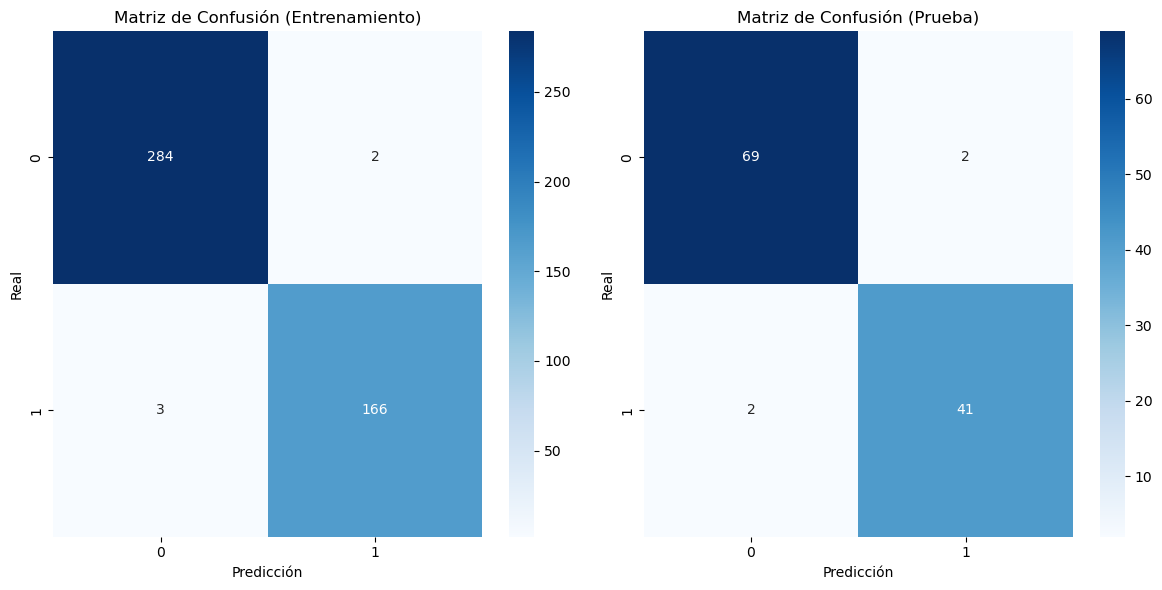

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definir una función para mostrar las matrices de confusión en una gráfica
def plot_confusion_matrix(ax, conf_matrix, title):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel('Predicción')
    ax.set_ylabel('Real')
    ax.set_title(title)

# Crear la figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Mostrar las matrices de confusión en gráficas
plot_confusion_matrix(axes[0], confusion_matrix_train, 'Matriz de Confusión (Entrenamiento)')
plot_confusion_matrix(axes[1], confusion_matrix_test, 'Matriz de Confusión (Prueba)')

# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()


La matriz de confusión muestran si el modelo logro predecir adecuadamente las personas que tienen cancer:


Para la clase 0 de la matriz de confusion conjunto de Prueba el modelo predijo correctamente 69  instancias (TP).
Para la clase 1, el modelo predijo correctamente 42 instancias (TP).


El modelo tuvo 2 falso negativo el cual significa que se diagnostico que una persona no tenia cancer cuando en realidad si tenia, influyendo en un tratamiento oportuno para su enfermedad.

Tambien se tuvo 2 falsos positivos que significa que se diagnostico a dos personas con cancer cuando en realidad no lo tenian.

MODELO N°4

DECISIONTREECLASSIFIER

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Inicializar el modelo de árbol de decisión
model = DecisionTreeClassifier()


In [ ]:
# Entrenar el modelo
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Hacer predicciones en el conjunto de prueba
predictions = model.predict(X_test)

In [ ]:
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9385964912280702


Es el valor de la precisión del modelo, que en este caso es aproximadamente 93.86%. Esto significa que alrededor del 93.86% de las muestras en el conjunto de prueba fueron clasificadas correctamente por el modelo de árbol de decisión. En otras palabras, el modelo tiene una tasa de predicciones correctas del 93.86%.

In [ ]:
# Mostrar un reporte de clasificación
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



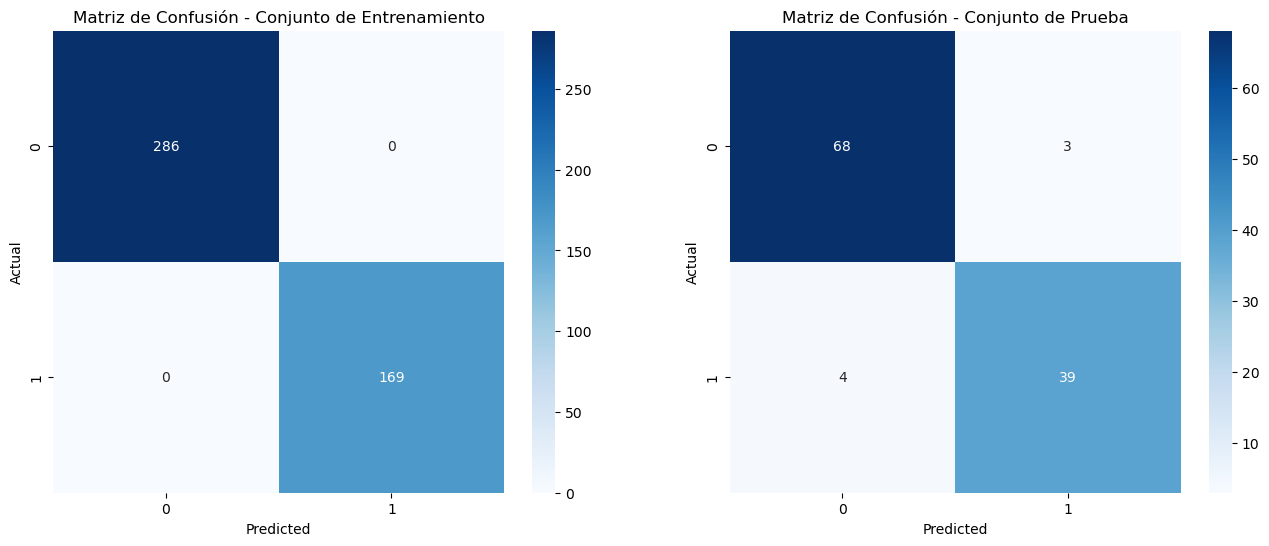

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión para el conjunto de entrenamiento
train_predictions = model.predict(X_train)
train_conf_matrix = confusion_matrix(y_train, train_predictions)

# Calcular la matriz de confusión para el conjunto de prueba
test_conf_matrix = confusion_matrix(y_test, predictions)

# Visualizar las matrices de confusión
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Matriz de confusión del conjunto de entrenamiento
sns.heatmap(train_conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Matriz de Confusión - Conjunto de Entrenamiento")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Matriz de confusión del conjunto de prueba
sns.heatmap(test_conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Matriz de Confusión - Conjunto de Prueba")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.show()


La matriz de confusión muestran si el modelo logro predecir adecuadamente las personas que tienen cancer:

Para la clase 0 de la matriz de confusion conjunto de Prueba el modelo predijo correctamente 68  instancias (TP).
Para la clase 1, el modelo predijo correctamente 39 instancias (TP).

El modelo tuvo 4 falso negativo el cual significa que se diagnostico que una persona no tenia cancer cuando en realidad si tenia, influyendo en un tratamiento oportuno para su enfermedad.

Tambien se tuvo 3 falsos positivos que significa que se diagnostico a dos personas con cancer cuando en realidad no lo tenian.

CONCLUSIONES:

El modelo Random Forest ofrece un equilibrio entre precisión, capacidad para manejar características complejas, robustez frente al sobreajuste y capacidad para manejar datos desequilibrados. Por lo tanto, basándonos en las métricas y considerando la naturaleza del problema de detección de cáncer, el modelo Random Forest es la mejor opción para este caso. Además tiene el número mas bajo de falsos positivos que es uno de los mas importantes en la predicción de cancer en un paciente.